<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/machine_learning/unsupervised_learning/clustering/k_means_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorytm K-średnich: metoda łokcia
Instalacja biblioteki scikit-learn:

In [0]:
!pip install scikit-learn

Aktualizacja do najnowszej wersji:

In [0]:
!pip install --upgrade scikit-learn

### Import bibliotek

In [0]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

### Wygenerowanie danych

In [7]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, x='x1', y='x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

### Algorytm K-średnich

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# wcss
kmeans.inertia_

3869.509252902728

In [10]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,3
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [11]:
px.scatter(df, x='x1', y='x2', color='y_kmeans', width=950, height=500, 
           title='Algorytm K-średnich - 5 klastrów', template='plotly_dark')

### WCSS - Within-Cluster Sum-of-Squared

In [12]:
wcss = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3869.7799663094133, 3446.064630498687, 3035.994593992194, 2716.8866776784453, 2471.4161945089572]


In [13]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3869.779966
4,5,3446.064630


### Metoda "łokcia" - Elbow Method

In [14]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

### Wizualizacja klastrów

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, x='x1', y='x2', color='y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', 
           template='plotly_dark')

In [18]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,3.630348,1.808377
1,-4.678306,6.633539
2,-5.302413,-5.404200


In [23]:
fig = px.scatter(df, x='x1', y='x2', color='y_kmeans', width=950, height=500, 
                 title='Algorytm K-średnich - 3 klastry', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}},
                         showlegend=False))
fig.show()

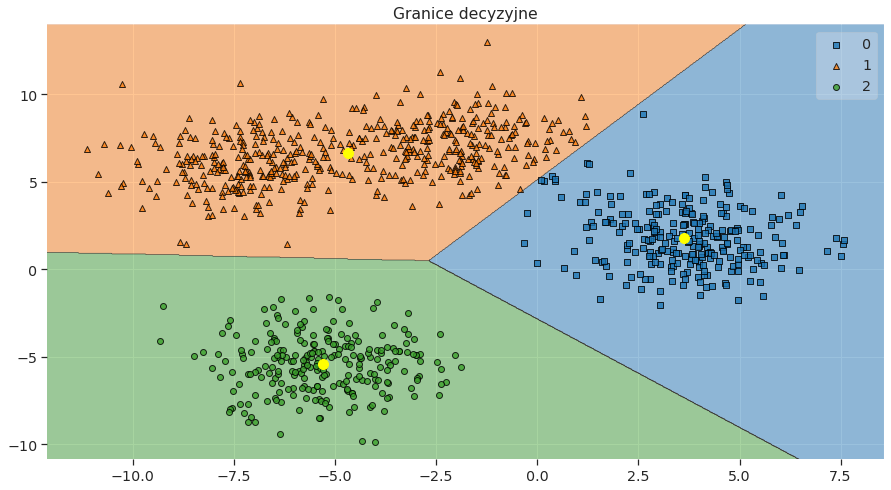

In [24]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()